# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

* labels: class_0~2
* features: real, positive

In [1]:
#필요 라이브러리 import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
import sklearn as sk
import os, random
import numpy as np

#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

* 버전 확인(하는 이유? 버전 충돌 문제를 방지하기 위해서, 버전 문제로 실행 안 되는 \
경우도 있기 때문에 한번 확인하는 편이 좋다.)

In [2]:
print(pd.__version__)
print(sk.__version__)

1.1.5
0.23.2


* random seed 고정 

In [3]:
# random seed 
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed) #sklearn 내부적으로 numpy 라이브러리 참고하기 때문에 함께 설정 
    
SEED = 42
set_seeds(SEED)

## 1. 데이터 준비 

In [4]:
wine = load_wine()
wine_data = wine.data
wine_label = wine.target

## 2. 데이터 이해하기 
### 2.1. Dataframe으로 자료형 변환 - Feature data 지정
* feature: 13차원, Alcohol, Malic acid, Color intensity 등 와인의 특성값
* 참고 링크: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#examples-using-sklearn-datasets-load-wine  
* pandas의 데이터프레임을 활용하여 wine 데이터의 feature를 불러온다.    

In [5]:
# feature의 이름 확인해보기 
feature_names = wine['feature_names']
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### 2.2. Dataframe에 column 추가 - Label data 지정
* 데이터의 정답지인 target(label)을 데이터프레임에 추가한다. 

In [7]:
wine_df['label'] = wine.target

# .head()로 앞쪽 부분만 확인
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 2.3. Target(=Label) Names 출력
* target과 label을 혼용해서 쓰면 헷갈리니까 Label이라고 일괄적으로 사용했다. 

In [8]:
label_names = wine['target_names'] # 위에서 정의한 wine_label은 train 각가의 라벨 데이터)
label_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

    - class_0~2까지의 자연수를 label(target)으로 가짐을 알 수 있다.    

In [9]:
print(len(wine_label),'개의 Train set의 label 데이터가 있습니다.')

178 개의 Train set의 label 데이터가 있습니다.


### 2.4. Data Describe

In [10]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


* 데이터셋 라벨별 개수 확인 

In [11]:
print(wine_df.iloc[:, -1].value_counts())

1    71
0    59
2    48
Name: label, dtype: int64


## 3. 데이터셋 분리 
* 일반적으로 Train과 Test를 4:1의 비율로 나눈다. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

* 막대그래프로 label별 개수 확인하기

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test labels count')

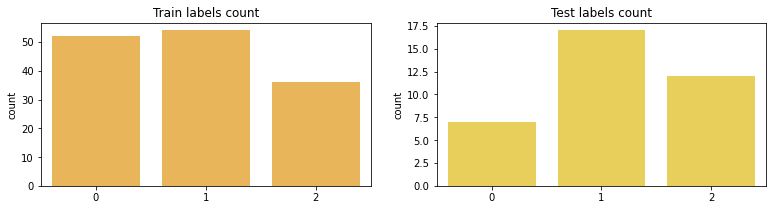

In [13]:
plt.figure(figsize=(13, 3))

plt.subplot(1, 2, 1)
sns.countplot(y_train, palette = ['#fb4'])
plt.title('Train labels count')

plt.subplot(1, 2, 2)
sns.countplot(y_test, palette=['#fd4'])
plt.title('Test labels count')

    - Train은 label = 2인 class_1 데이터가 상대적으로 적고, Test 같은 경우 다른 label에 비해 label = 0인 Test set이 적다. 

## 4. 다양한 모델로 학습해보기 

In [14]:
#사용 모델 import 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import LogisticRegression 

### 4.1. Decision Tree

In [15]:
DT = DecisionTreeClassifier(random_state=32)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

### 4.2. Random Forest

In [16]:
RF = RandomForestClassifier(random_state=32)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

### 4.3. SVM

In [17]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

### 4.4. SGD

In [18]:
SGD = SGDClassifier()
SGD.fit(X_train, y_train)

SGDClassifier()

### 4.5. Logistic Regression

In [19]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

## 5. 모델 평가

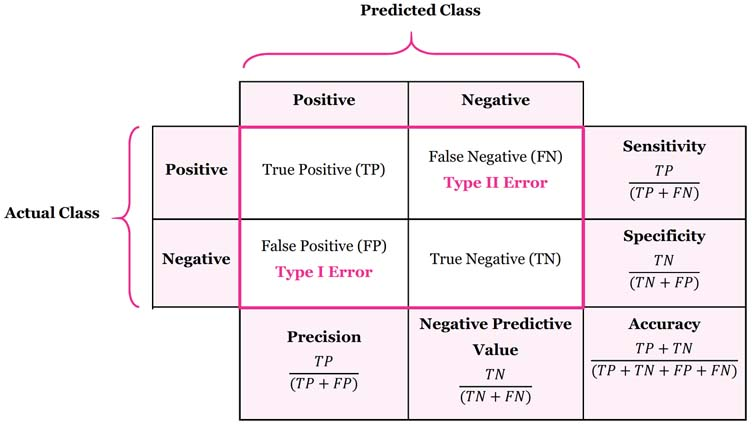

* 참고 링크: https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html    
* 참고 링크: https://gaussian37.github.io/ml-concept-ml-evaluation/    
* Confusion Matrix(CM)
    - 정확도(accuracy): 전체 샘플 중 맞게 예측한 샘플 수의 비율 
    - 정밀도(precision): 양성 클래스에 속한다고 판단된 출력 샘플 중 실제로 양성 클래스에 속하는 샘플 수 의 비율(e.g. 판단된 사기 거래 중 실제 사기라고 예측된 비율)
    - 재현율(recall, sensitivity): 실제 양성 클래스에 속한 샘플 중 양성 클래스에 속한다고 출력한 샘플 수의 비율
    - 특이도(=위양성율, fall-out, specificity): 실제 양성 클래스에 속하지 않는 샘플 중 양성에 속한다고 출력한 샘플의 비율

### 5.1. Decision Tree

In [20]:
dt_y_pred = DT.predict(X_test)

In [21]:
print("Decision Tree의 CM(Confusion Matrix)")
print(classification_report(y_test, dt_y_pred))

Decision Tree의 CM(Confusion Matrix)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### 5.2. Random Forest - Ensemble 기법
* 참고 링크: https://medium.com/@deepvalidation/title-3b0e263605de    

In [22]:
rf_y_pred = RF.predict(X_test)

In [23]:
print("Random Forest의 CM(Confusion Matrix)")
print(classification_report(y_test, rf_y_pred))

Random Forest의 CM(Confusion Matrix)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 5.3. SVM 
* 참고 링크: https://excelsior-cjh.tistory.com/66?category=918734    

In [24]:
svm_y_pred = SVM.predict(X_test)

In [25]:
print("SVM의 CM(Confusion Matrix)")
print(classification_report(y_test, svm_y_pred))

SVM의 CM(Confusion Matrix)
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



### 5.4. SGD  
* 참고 링크: https://scikit-learn.org/stable/modules/sgd.html    

In [26]:
sgd_y_pred = SGD.predict(X_test)

In [27]:
print("SGD의 CM(Confusion Matrix)")
print(classification_report(y_test, sgd_y_pred))

SGD의 CM(Confusion Matrix)
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.57      0.94      0.71        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.63      0.58      0.56        36
weighted avg       0.58      0.61      0.54        36



### 5.5. Logistic Regression
* 참고 링크: http://hleecaster.com/ml-logistic-regression-concept/

In [28]:
lr_y_pred = LR.predict(X_test)

In [29]:
print("Logistic Regression의 CM(Confusion Matrix)")
print(classification_report(y_test, lr_y_pred))

Logistic Regression의 CM(Confusion Matrix)
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



### 5.6. 최고 성능 모델 도출하기 

In [30]:
model_names = ['DT', 'RF', 'SVM', 'SGD', 'LR']
accuracy_scores = [accuracy_score(y_test, dt_y_pred),     
                   accuracy_score(y_test, rf_y_pred),
                   accuracy_score(y_test, svm_y_pred),
                   accuracy_score(y_test, sgd_y_pred),
                   accuracy_score(y_test, lr_y_pred)]

accuracy_df = pd.DataFrame([x for x in zip(model_names, accuracy_scores)], columns=['model_name', 'accuracy'])
accuracy_df.sort_values(by = ['accuracy'], ascending = False)

,model_name,accuracy
1,RF,1.000000
4,LR,0.972222
0,DT,0.944444
2,SVM,0.611111
3,SGD,0.611111


    - 5개의 모델 중 accuracy가 가장 높은 것은 RF = 1.이다.

## 6. 루브릭

* 평가문항 
    1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?    
    - feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨
    2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?    
    - 모델학습 및 테스트가 정상적으로 수행되었음
    3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?    
    - 평가지표 선택 및 이유 설명이 타당함

### 6.1. Accuracy만 항상 평가척도가 되는가?
* 그렇지 않다, 가장 적은 Test 데이터 개수를 가진 0을 활용해서 실험해본다. \
* label이 0인지 아닌지를 맞추는 문제로 변형해봄으로써 정확도의 함정을 찾는다.
* 높은 정확도가 나오더라도 정확도가 성능 평가척도로서 부적절할 수 있다. 

In [31]:
new_label = [0 if i == 0 else 1 for i in wine_label]
new_label[:20] # 전체 label은 많기 때문에 slicing해서 부분만 확인 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

* Confusion Matrix에서 4가지 경우(TP, FN, FP, TN)를 살펴보기 위해서는 100%가 나오기 보다는 그 점수보다 낮아야 비교하기 수월하다. \
따라서 앞선 결과에서 SGD가 가장 낮은 정확도를 가졌으므로 SGD로 fake prediction을 적용해보는 것이 좋다. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

SGD.fit(X_train, y_train) 

sgd_n_y_pred = SGD.predict(X_test)

accuracy = accuracy_score(y_test, sgd_n_y_pred)
accuracy

0.8055555555555556

* 막대 그래프로 label별 데이터 개수 확인하기    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test labels count')

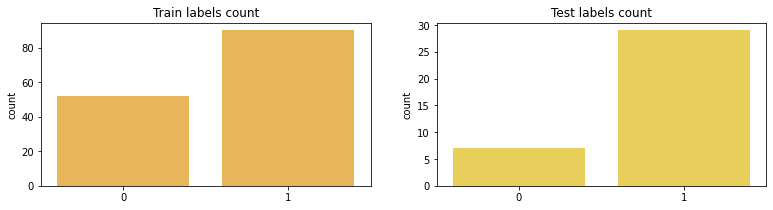

In [33]:
plt.figure(figsize=(13, 3))

plt.subplot(1, 2, 1)
sns.countplot(y_train, palette = ['#fb4'])
plt.title('Train labels count')

plt.subplot(1, 2, 2)
sns.countplot(y_test, palette=['#fd4'])
plt.title('Test labels count')

    - 0이 Train의 label(target = 정답지)인 경우만 데이터를 살리고 이외는 1로 처리함으로써 데이터의 불균형이 발생한다. 

* 가짜 정답지 제출해보기
    - 모두 1로 답을 찍었을 때의 가짜 정답지를 활용해 정확도의 함정을 찾을 수 있다. 

In [34]:
fake_pred = [1]*len(sgd_n_y_pred)
accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.8055555555555556

     - 1로 가짜 정답지를 만들어서 제출하더라도 약 81%의 정답률이 나오는 것을 확인할 수 있다. 따라서 정확도는 해당 Dataset에 적용하기 부적절하다.

### 6.2. 해당 경우는 어떤 평가지표를 사용해야하는가? 

* Fake prediction의 Confusion Matrix

In [35]:
print("Fake pred을 적용했을때 SGD의 CM(Confusion Matrix):")
print(confusion_matrix(y_test, fake_pred))
print()
print(classification_report(y_test, fake_pred))

Fake pred을 적용했을때 SGD의 CM(Confusion Matrix):
[[ 0  7]
 [ 0 29]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      1.00      0.89        29

    accuracy                           0.81        36
   macro avg       0.40      0.50      0.45        36
weighted avg       0.65      0.81      0.72        36



/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


     - 0이 Negative이지만 값의 반영을 위해 Positive로 두고 나머지를 1로 Negative로 두었다. 
     - CM을 반대로 이해하면 된다. 0(Negative)으로 예측했고 1(Positive)로 예측한 것은 없기 때문에 FN과 TN은 둘다 0이다. 
     - 1이 29개로 데이터 많기 때문에 precision과 recall에서 높은 점수를 받았다. 
     - precision과 recall이 trade-off임을 고려해서 이번에는 recall로 성능을 비교했다. 

### 6.3. 어떤 모델이 가장 성능이 좋게 나오는가?

* 정상 데이터인 0(Negative)를 놓치면 안 된다고 할 때에는 Precision이 더 중요하다.
* Precision은 음성인데 양성으로 판단하는 경우(FP)가 적어야 값이 크다. 

* 5개 모델 학습 및 예측

In [36]:
RF.fit(X_train, y_train) 
SVM.fit(X_train, y_train) 
DT.fit(X_train, y_train) 
LR.fit(X_train, y_train) 

rf_n_y_pred = RF.predict(X_test)
svm_n_y_pred = SVM.predict(X_test)
dt_n_y_pred = SGD.predict(X_test)
lr_n_y_pred = LR.predict(X_test)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* 각 모델의 CM 출력 후 Precision 비교

In [37]:
print("New label의 pred을 적용했을때 SGD의 CM(Confusion Matrix):")
print(confusion_matrix(y_test, sgd_n_y_pred))
print()
print(classification_report(y_test, sgd_n_y_pred))

New label의 pred을 적용했을때 SGD의 CM(Confusion Matrix):
[[ 0  7]
 [ 0 29]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      1.00      0.89        29

    accuracy                           0.81        36
   macro avg       0.40      0.50      0.45        36
weighted avg       0.65      0.81      0.72        36



/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print("New label의 pred을 적용했을때 DT의 CM(Confusion Matrix):")
print(confusion_matrix(y_test, dt_n_y_pred))
print()
print(classification_report(y_test, dt_n_y_pred))

New label의 pred을 적용했을때 DT의 CM(Confusion Matrix):
[[ 0  7]
 [ 0 29]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      1.00      0.89        29

    accuracy                           0.81        36
   macro avg       0.40      0.50      0.45        36
weighted avg       0.65      0.81      0.72        36



In [39]:
print("New label의 pred을 적용했을때 RF의 CM(Confusion Matrix):")
print(confusion_matrix(y_test, rf_n_y_pred))
print()
print(classification_report(y_test, rf_n_y_pred))

New label의 pred을 적용했을때 RF의 CM(Confusion Matrix):
[[ 7  0]
 [ 0 29]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        29

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [40]:
print("New label의 pred을 적용했을때 SVM의 CM(Confusion Matrix):")
print(confusion_matrix(y_test, svm_n_y_pred))
print()
print(classification_report(y_test, svm_n_y_pred))

New label의 pred을 적용했을때 SVM의 CM(Confusion Matrix):
[[ 6  1]
 [ 1 28]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        29

    accuracy                           0.94        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.94      0.94      0.94        36



In [41]:
print("New label의 pred을 적용했을때 LR의 CM(Confusion Matrix):")
print(classification_report(y_test, lr_n_y_pred))

New label의 pred을 적용했을때 LR의 CM(Confusion Matrix):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.97      0.98        29

    accuracy                           0.97        36
   macro avg       0.94      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



    - macro avg 기준에서는 1로 RF가 가장 성능이 좋다. 
    - weighted avg 기준에서는 1로 RF가 가장 성능이 좋다.
    - accuracy 기준으로 y_pred는 0.97, fake_pred는 0.81로 결과가 나온 것과 비교했을 때 recall 기준으로는 y_pred는 
    가장 성능이 좋게 나온 RF로 훈련한 결과 1.0(macro avg), 1(weighted avg)이었고, fake_pred는 0.5(macro avg), 
    0.65(weighted avg)의 결과로 큰 차이가 있었다. 

## 7. 회고

* 어려웠던 점 & 모호한 점 
    - Positive와 Negative를 반대로 해주고 분석했는데 맞는 정답인지 모르겠다. 
  
* 다짐
    - CM에서 0인 label을 Negative로 어떻게 취급하는지 알아봐야겠다. 